##### PROBLEM STATEMENT

###### Iris flower has three species; satosa, versicolor, and virginica, which differs according to
their measurements. Now assume that you have the measurements of the iris flowers according to ther
species, and here your task is to train a machine leaming model that can learn from the

###### measurements of the iris species and classify them. Although the Scot-learn library provides 
a dataset for is flower classification, you can also download the same datumet from here for the
task of in flower classification with Machine

#### Import Libraries

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns


#### read dataset

In [3]:
iris_data = pd.read_csv("Iris.csv")


#### head of dataset

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### keys

In [5]:
iris_data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Species

In [6]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### shape of dataset

In [7]:
print("shape of dataset :",iris_data.shape) 

shape of dataset : (150, 6)


### summary of the data

In [8]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### How many mising values are present?


In [9]:
iris_data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Information about all variables of the dataset

In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### plot species

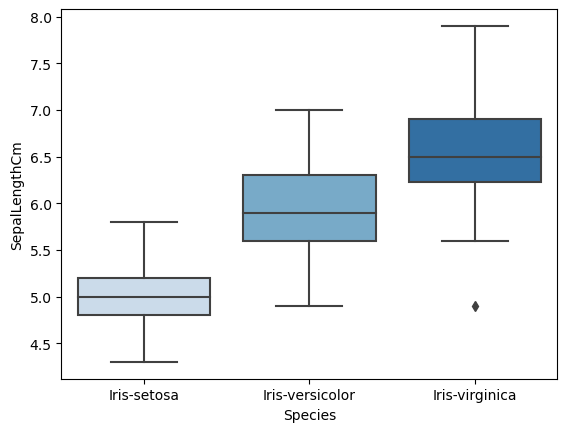

In [12]:
sns.boxplot(x="Species",y="SepalLengthCm",data= iris_data,palette="Blues")
plt.show()

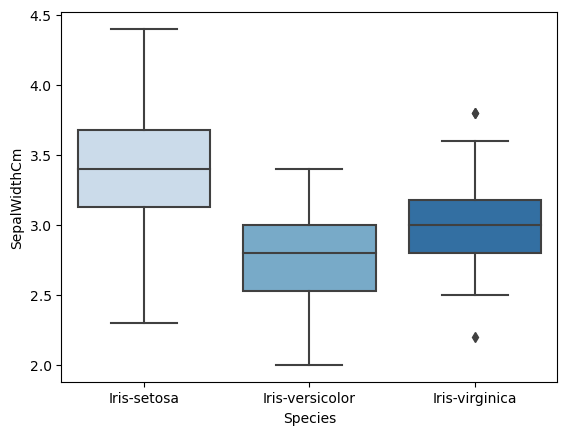

In [57]:
sns.boxplot(x="Species",y="SepalWidthCm",data= iris_data,palette="Blues")
plt.show()

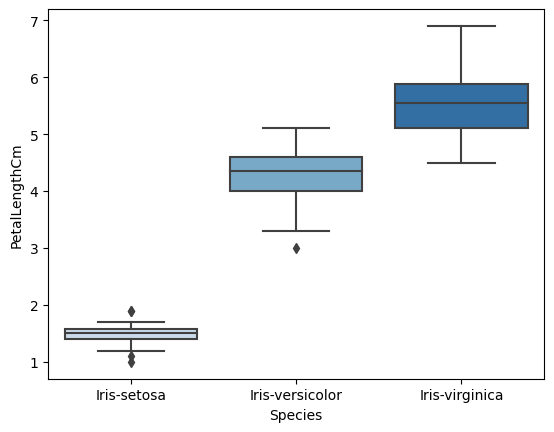

In [58]:
sns.boxplot(x="Species",y="PetalLengthCm",data= iris_data,palette="Blues")
plt.show()

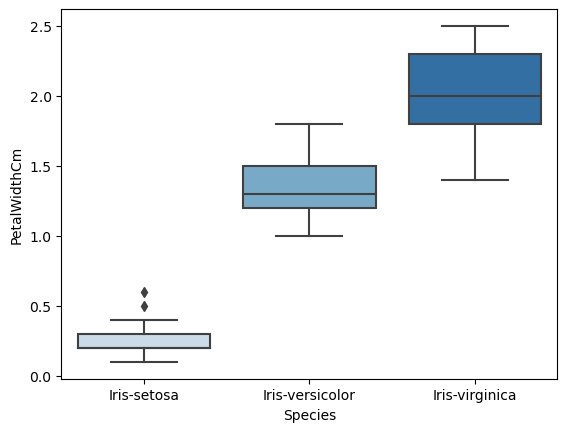

In [59]:
sns.boxplot(x="Species",y="PetalWidthCm",data= iris_data,palette="Blues")
plt.show()

##### split the data into train and test set
##### train =70% and test =30%

In [61]:
train,test = train_test_split(iris_data,test_size=0.30)

##### train data

In [62]:
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,121,6.9,3.2,5.7,2.3,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica
...,...,...,...,...,...,...
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa


##### test data

In [67]:
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [70]:
train.count()

Id               105
SepalLengthCm    105
SepalWidthCm     105
PetalLengthCm    105
PetalWidthCm     105
Species          105
dtype: int64

In [69]:
test.count()

Id               45
SepalLengthCm    45
SepalWidthCm     45
PetalLengthCm    45
PetalWidthCm     45
Species          45
dtype: int64

##### split the features and targets


In [79]:
train_x=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y=train.Species

test_x=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y=train.Species


###### features of train data 

In [80]:
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
147,6.5,3.0,5.2,2.0
87,6.3,2.3,4.4,1.3
71,6.1,2.8,4.0,1.3
117,7.7,3.8,6.7,2.2
...,...,...,...,...
83,6.0,2.7,5.1,1.6
32,5.2,4.1,1.5,0.1
46,5.1,3.8,1.6,0.2
31,5.4,3.4,1.5,0.4


In [81]:
train_y

120     Iris-virginica
147     Iris-virginica
87     Iris-versicolor
71     Iris-versicolor
117     Iris-virginica
            ...       
83     Iris-versicolor
32         Iris-setosa
46         Iris-setosa
31         Iris-setosa
28         Iris-setosa
Name: Species, Length: 105, dtype: object

In [82]:
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
147,6.5,3.0,5.2,2.0
87,6.3,2.3,4.4,1.3
71,6.1,2.8,4.0,1.3
117,7.7,3.8,6.7,2.2
...,...,...,...,...
83,6.0,2.7,5.1,1.6
32,5.2,4.1,1.5,0.1
46,5.1,3.8,1.6,0.2
31,5.4,3.4,1.5,0.4


In [83]:
test_y

120     Iris-virginica
147     Iris-virginica
87     Iris-versicolor
71     Iris-versicolor
117     Iris-virginica
            ...       
83     Iris-versicolor
32         Iris-setosa
46         Iris-setosa
31         Iris-setosa
28         Iris-setosa
Name: Species, Length: 105, dtype: object

##### Train model using vector method 

In [84]:
model=svm.SVC()
model.fit(train_x,train_y)

SVC()

###### Predict data 

In [93]:
predict = model.predict(test_x)

###### Compare train and test 

In [94]:
metrics.accuracy_score(predict,test_y)

0.9714285714285714

##### Test the model

In [95]:
test=np.array([[4,3,2,5]])
iris_name=model.predict(test)
print(iris_name)

['Iris-virginica']


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
